In [104]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import yfinance as yf
import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_data


In [105]:
#Create data frame for S&P 500
index_name = 'SP_500'
companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', flavor='bs4')[0]
companies

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [106]:
#Filter data frame to pharmaceutical companies
pharma_filter = companies.loc[:,"GICS Sub-Industry"]=='Pharmaceuticals'
pharma_df = companies.loc[pharma_filter,:]
pharma_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992
88,CTLT,Catalent,reports,Health Care,Pharmaceuticals,"Somerset, New Jersey",2020-09-21,1596783,2007
263,JNJ,Johnson & Johnson,reports,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886
286,LLY,Lilly (Eli) & Co.,reports,Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876
310,MRK,Merck & Co.,reports,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891
365,PRGO,Perrigo,reports,Health Care,Pharmaceuticals,"Dublin, Ireland",2011-12-19,1585364,2013 (1887)
366,PFE,Pfizer Inc.,reports,Health Care,Pharmaceuticals,"New York, New York",1957-03-04,78003,1849
472,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
504,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952


In [200]:
#Add market cap
for index, stock in pharma_df.iterrows():
    symbol = pharma_df.loc[index,'Symbol']#f"{stock['Symbol']}"
    market_cap = float(si.get_quote_table(symbol)['Market Cap'].replace('B',''))
    pharma_df.loc[index,'Market Cap ($Billion)']= market_cap

#Filter by market cap
pharma_df = pharma_df.sort_values('Market Cap ($Billion)')    
pharma_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,Market Cap ($Billion)
365,PRGO,Perrigo,reports,Health Care,Pharmaceuticals,"Dublin, Ireland",2011-12-19,1585364,2013 (1887),5.828
88,CTLT,Catalent,reports,Health Care,Pharmaceuticals,"Somerset, New Jersey",2020-09-21,1596783,2007,18.949
472,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961,20.425
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992,33.536
504,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952,73.310
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),180.925
310,MRK,Merck & Co.,reports,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891,194.989
286,LLY,Lilly (Eli) & Co.,reports,Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876,198.940
366,PFE,Pfizer Inc.,reports,Health Care,Pharmaceuticals,"New York, New York",1957-03-04,78003,1849,199.547
263,JNJ,Johnson & Johnson,reports,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886,429.446


Text(0, 0.5, 'Market Cap ($Billion)')

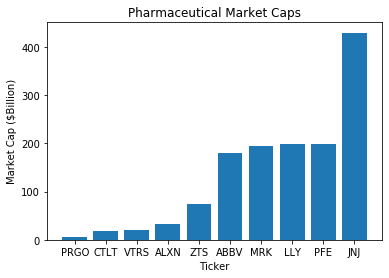

In [109]:
# Create bar chart for market cap
y_axis= pharma_df['Market Cap ($Billion)']
x_axis= pharma_df['Symbol']
pharma_chart=plt.bar(x_axis,y_axis)
plt.title("Pharmaceutical Market Caps")
plt.xlabel("Ticker")
plt.ylabel("Market Cap ($Billion)")

Text(0.5, 1.0, 'Distribution by Market Cap')

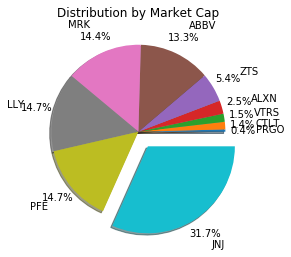

In [110]:
#Create pie chart for market cap
labels = pharma_df['Symbol']
explode = (0,0,0,0,0,0,0,0,0,0.2)
plt.pie(pharma_df['Market Cap ($Billion)'], labels=labels, explode=explode, shadow=True,autopct='%1.1f%%',pctdistance=1.2, labeldistance=1.35)

plt.title("Distribution by Market Cap")

In [207]:
#Create data frame with date index 
pharma_data = get_data('JNJ', start_date='01/01/2015', end_date='12/31/2020', interval ='1d').index
pharma_data_df = pd.DataFrame(index=pharma_data)
pharma_data_df

#Find daily close, volume and calculate returns for all symbols and then add to dataframe
for index, stock in pharma_df.iterrows():
    symbol = pharma_df.loc[index,'Symbol']#f"{stock['Symbol']}"
    symbol_data= get_data(symbol, start_date='01/01/2015', end_date='12/31/2020', interval ='1d')[['close','volume']]
    symbol_data=symbol_data.rename(columns={'close' : f"{symbol}_close", 'volume' : f"{symbol}_volume"})
    symbol_data[f"{symbol}_return"] = symbol_data[f"{symbol}_close"].diff() /symbol_data[f"{symbol}_close"]
    pharma_data_df = pd.merge(pharma_data_df, symbol_data, left_index=True, right_index=True)

pharma_data_df.to_csv('daily_pharma_data.csv')
pharma_data_df

,PRGO_close,PRGO_volume,PRGO_return,CTLT_close,CTLT_volume,CTLT_return,VTRS_close,VTRS_volume,VTRS_return,ALXN_close,...,MRK_return,LLY_close,LLY_volume,LLY_return,PFE_close,PFE_volume,PFE_return,JNJ_close,JNJ_volume,JNJ_return
2015-01-02,166.630005,710700,NaN,27.510000,187300,NaN,56.349998,1398000,NaN,186.600006,...,NaN,70.059998,3146200,NaN,29.724857,16371571,NaN,104.519997,5753600,NaN
2015-01-05,164.910004,725500,-0.010430,28.080000,455200,0.020299,55.720001,2996200,-0.011306,182.169998,...,0.014645,69.370003,4845500,-0.009947,29.563566,24786391,-0.005456,103.790001,8079300,-0.007033
2015-01-06,164.600006,878500,-0.001883,26.549999,622100,-0.057627,54.180000,6610900,-0.028424,177.949997,...,0.037798,69.720001,5127400,0.005020,29.810247,29468681,0.008275,103.279999,7428000,-0.004938
2015-01-07,167.350006,851300,0.016433,27.809999,457200,0.045307,56.110001,3663000,0.034397,187.929993,...,0.020938,69.230003,9043000,-0.007078,30.218216,20248816,0.013501,105.559998,7931700,0.021599
2015-01-08,171.169998,1117200,0.022317,27.990000,183800,0.006431,56.650002,3164000,0.009532,183.800003,...,0.019729,70.870003,7472200,0.023141,30.834915,49169522,0.020000,106.389999,9916000,0.007802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,43.660000,904600,-0.004352,104.860001,618900,-0.000286,17.879999,6303400,0.007830,153.240005,...,0.004263,165.479996,1697300,-0.007493,37.439999,36182000,0.018697,151.940002,4607300,-0.005134
2020-12-24,44.009998,379100,0.007953,105.309998,277800,0.004273,17.770000,1946600,-0.006190,152.630005,...,0.004742,166.660004,627200,0.007080,37.270000,14790100,-0.004561,152.470001,2114900,0.003476
2020-12-28,44.650002,686700,0.014334,102.879997,582000,-0.023620,17.740000,4933900,-0.001691,154.360001,...,0.003853,166.500000,1482000,-0.000961,36.820000,26993700,-0.012222,153.190002,3855500,0.004700
2020-12-29,44.549999,606700,-0.002245,102.709999,549200,-0.001655,17.750000,4811800,0.000563,155.350006,...,0.011914,166.580002,1712000,0.000480,37.049999,23152100,0.006208,154.139999,5212000,0.006163


In [199]:
#Find SPY data
SPY_data = get_data('SPY', start_date='01/01/2015', end_date='12/31/2020', interval ='1d')
SPY_data['SPY_return'] = SPY_data["close"].diff() /SPY_data["close"]
SPY_data = SPY_data.rename(columns={'close': 'SPY_close'})

In [114]:
SPY_data

,open,high,low,close,adjclose,volume,ticker
2015-01-02,206.380005,206.880005,204.179993,205.429993,182.746567,121465900,SPY
2015-01-05,204.169998,204.369995,201.350006,201.720001,179.446259,169632600,SPY
2015-01-06,202.089996,202.720001,198.860001,199.820007,177.756073,209151400,SPY
2015-01-07,201.419998,202.720001,200.880005,202.309998,179.971115,125346700,SPY
2015-01-08,204.009995,206.160004,203.990005,205.899994,183.164703,147217800,SPY
...,...,...,...,...,...,...,...
2020-12-23,368.279999,369.619995,367.220001,367.570007,367.570007,46201400,SPY
2020-12-24,368.079987,369.029999,367.450012,369.000000,369.000000,26457900,SPY
2020-12-28,371.739990,372.589996,371.070007,372.170013,372.170013,39000400,SPY
2020-12-29,373.809998,374.000000,370.829987,371.459991,371.459991,53680500,SPY


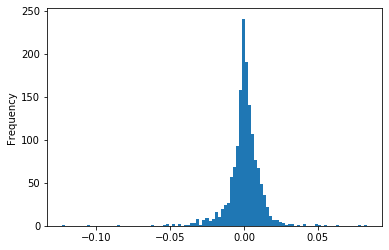

In [119]:
SPY_data['SPY_return'].plot.hist(bins=100)

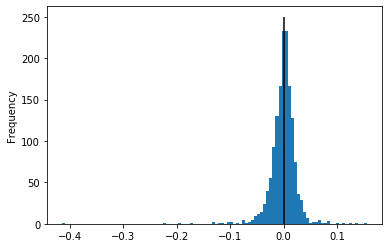

In [123]:
pharma_data_df['PRGO_return'].plot.hist(bins=100)
plt.vlines(0, 0, 250, colors='black')

In [208]:
#Create close price data frame for all pharma symbols and SPY
close_df = pharma_data_df[['JNJ_close',
                                     'PFE_close',
                                    'LLY_close',
                                    'PRGO_close', 
                                    'CTLT_close',                                  
                                    'VTRS_close',                                 
                                    'ALXN_close',                                  
                                    'ZTS_close',                                    
                                    'ABBV_close',                                  
                                    'MRK_close']]                                                           
close_df.to_csv('close_price_data.csv')
close_df   

,JNJ_close,PFE_close,LLY_close,PRGO_close,CTLT_close,VTRS_close,ALXN_close,ZTS_close,ABBV_close,MRK_close
2015-01-02,104.519997,29.724857,70.059998,166.630005,27.510000,56.349998,186.600006,43.310001,65.889999,57.189999
2015-01-05,103.790001,29.563566,69.370003,164.910004,28.080000,55.720001,182.169998,43.049999,64.650002,58.040001
2015-01-06,103.279999,29.810247,69.720001,164.600006,26.549999,54.180000,177.949997,42.630001,64.330002,60.320000
2015-01-07,105.559998,30.218216,69.230003,167.350006,27.809999,56.110001,187.929993,43.509998,66.930000,61.610001
2015-01-08,106.389999,30.834915,70.870003,171.169998,27.990000,56.650002,183.800003,44.180000,67.629997,62.849998
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,151.940002,37.439999,165.479996,43.660000,104.860001,17.879999,153.240005,159.850006,103.279999,79.760002
2020-12-24,152.470001,37.270000,166.660004,44.009998,105.309998,17.770000,152.630005,160.720001,103.260002,80.139999
2020-12-28,153.190002,36.820000,166.500000,44.650002,102.879997,17.740000,154.360001,162.389999,103.449997,80.449997
2020-12-29,154.139999,37.049999,166.580002,44.549999,102.709999,17.750000,155.350006,163.119995,104.699997,81.419998


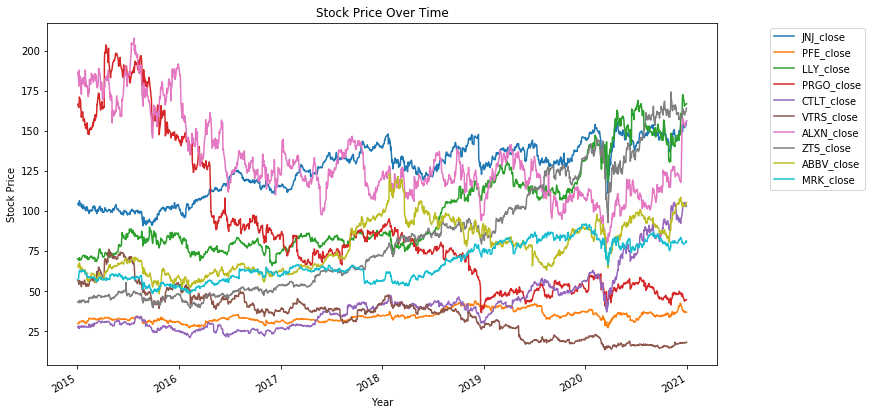

In [206]:
#Create line plot of close prices
close_plot = close_df.plot.line(figsize =(12,7))
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.title('Stock Price Over Time')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center',)

In [209]:
#Create returns dataframe
returns_df = pd.merge(pharma_data_df[['JNJ_return',
                                     'PFE_return',
                                    'LLY_return',
                                    'PRGO_return', 
                                    'CTLT_return',                                  
                                    'VTRS_return',                                 
                                    'ALXN_return',                                  
                                    'ZTS_return',                                    
                                    'ABBV_return',                                  
                                    'MRK_return']],SPY_data['SPY_return'], left_index=True, right_index=True)                                                           
returns_df=returns_df.rename(columns={'SPY_return': 'SPY',
                                    'JNJ_return': 'JNJ',
                                    'PFE_return': 'PFE',
                                    'LLY_return': 'LLY',
                                    'PRGO_return': 'PRGO', 
                                    'CTLT_return': 'CTLT',                                  
                                    'VTRS_return': 'VTRS',                                 
                                    'ALXN_return': 'ALXN',                                  
                                    'ZTS_return': 'ZTS',                                    
                                    'ABBV_return': 'ABBV',                                  
                                    'MRK_return': 'MRK'})    
returns_df.to_csv('daily_returns.csv')
returns_df

,JNJ,PFE,LLY,PRGO,CTLT,VTRS,ALXN,ZTS,ABBV,MRK,SPY
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.007033,-0.005456,-0.009947,-0.010430,0.020299,-0.011306,-0.024318,-0.006040,-0.019180,0.014645,-0.018392
2015-01-06,-0.004938,0.008275,0.005020,-0.001883,-0.057627,-0.028424,-0.023715,-0.009852,-0.004974,0.037798,-0.009509
2015-01-07,0.021599,0.013501,-0.007078,0.016433,0.045307,0.034397,0.053105,0.020225,0.038847,0.020938,0.012308
2015-01-08,0.007802,0.020000,0.023141,0.022317,0.006431,0.009532,-0.022470,0.015165,0.010350,0.019729,0.017436
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.005134,0.018697,-0.007493,-0.004352,-0.000286,0.007830,-0.003720,-0.012387,0.004648,0.004263,0.000898
2020-12-24,0.003476,-0.004561,0.007080,0.007953,0.004273,-0.006190,-0.003997,0.005413,-0.000194,0.004742,0.003875
2020-12-28,0.004700,-0.012222,-0.000961,0.014334,-0.023620,-0.001691,0.011208,0.010284,0.001837,0.003853,0.008518
2020-12-29,0.006163,0.006208,0.000480,-0.002245,-0.001655,0.000563,0.006373,0.004475,0.011939,0.011914,-0.001911


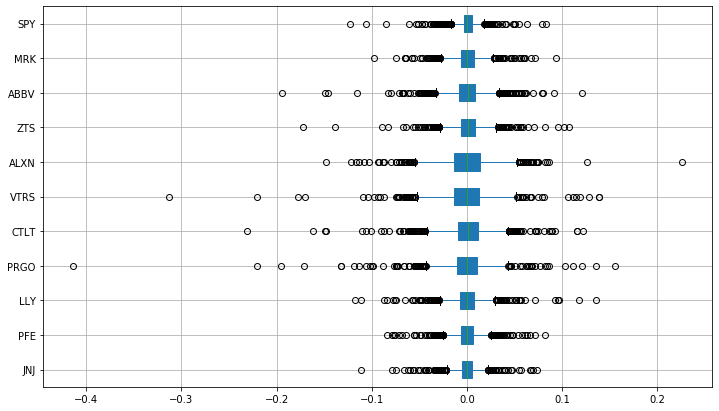

In [198]:
#Create box plot of returns
fig = returns_df.boxplot(figsize = (12,7), vert=0, patch_artist=True)
